In [2]:
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = 'vcf/Matrix2.csv'

In [4]:
data = pd.read_csv(DATA_PATH, index_col=0) 

In [ ]:
jnp.where

In [ ]:
jax.random

In [24]:
def filter_for_sparsity(data, cutoff=1): 
    sum_across_samples = jnp.sum(data.values, axis=1) 
    indices = jnp.where(sum_across_samples > cutoff)
    non_one = data.iloc[indices[0], :] 
    return non_one 

def filter_and_downsample(data, N=1000): 
    non_sparse_odorants = filter_for_sparsity(data)
    return non_sparse_odorants.sample(N, replace=False)

In [25]:
subsampled_data = filter_and_downsample(data)

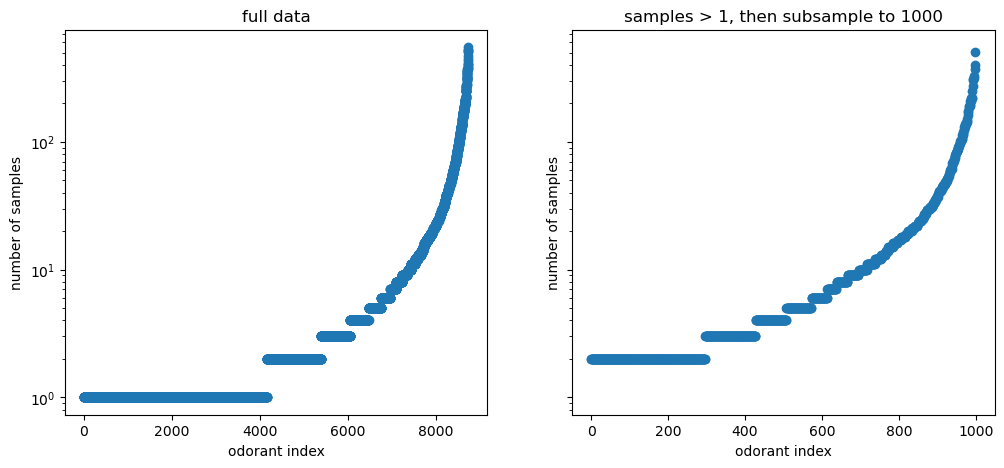

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_sums(data, ax):
    sums = jnp.sum(data.values, axis=1) 
    ax.scatter(range(len(sums)), jnp.sort(sums))
    ax.set_yscale('log') 
    ax.set_ylabel('number of samples') 
    ax.set_xlabel('odorant index') 
    return sums, ax

plot_sums(data, axs[0]) 
plot_sums(subsampled_data, axs[1]); 
axs[0].set_title('full data') 
axs[1].set_title('samples > 1, then subsample to 1000')
fig.savefig('tmp.png') 